# Machine Learning Final Project

In [198]:
# Importing necessary libraries for data analysis and machine learning

# Pandas for data manipulation and analysis
import pandas as pd

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime for working with dates and times
from datetime import datetime

# KMeans algorithm for clustering
from sklearn.cluster import KMeans

# StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# train_test_split for splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

# LabelEncoder for converting categorical labels to numerical format
from sklearn.preprocessing import LabelEncoder

# KNeighborsClassifier for K-Nearest Neighbors classification
from sklearn.neighbors import KNeighborsClassifier

# GaussianNB for Naive Bayes classification
from sklearn.naive_bayes import GaussianNB

# LogisticRegression for logistic regression classification
from sklearn.linear_model import LogisticRegression

# RandomForestRegressor for regression
from sklearn.ensemble import RandomForestClassifier 


# Metrics for evaluating machine learning models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [199]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("new_marketing_campaign.csv")
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


# Data Cleaning 

In [200]:
# Dropping columns from the DataFrame
df = df.drop(['ID','Recency','Z_CostContact','Z_Revenue'], axis=1)

In [201]:
# Renaming columns in the DataFrame for better clarity and consistency
df = df.rename(columns={'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals',
                           'NumWebPurchases': 'Web',
                            'NumCatalogPurchases':'Catalog',
                            'NumStorePurchases':'Store',
                            'NumWebVisitsMonth':'Web_Visits',
                            'AcceptedCmp1':'Campaign_1',
                        'AcceptedCmp2':'Campaign_2',
                        'AcceptedCmp3':'Campaign_3',
                        'AcceptedCmp4':'Campaign_4',
                        'AcceptedCmp5':'Campaign_5',
                       
                       })

In [202]:
df.head().T

,0,1,2,3,4
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Wines,635,11,426,11,173
Fruits,88,1,49,4,43
Meat,546,6,127,20,118


In [187]:
df = df.fillna(df.median())

C:\Users\Acer\AppData\Local\Temp\ipykernel_16148\3493596106.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [203]:
# Check for missing values in each column of the DataFrame (df) and sum the number of null values in each column.
df.isnull().sum()

Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Dt_Customer        0
Wines              0
Fruits             0
Meat               0
Fish               0
Sweets             0
Gold               0
Deals              0
Web                0
Catalog            0
Store              0
Web_Visits         0
Campaign_3         0
Campaign_4         0
Campaign_5         0
Campaign_1         0
Campaign_2         0
Complain           0
Response           0
dtype: int64

In [204]:
#Dropping Na values
df.dropna().T

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Wines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84
Fruits,88,1,49,4,43,42,65,10,0,0,...,3,10,1,14,3,43,0,48,30,3
Meat,546,6,127,20,118,98,164,56,24,6,...,26,143,6,18,7,182,30,217,214,61


In [139]:
# Check for missing values in each column of the DataFrame (df) and sum the number of null values in each column.
df.isnull().sum()

Year_Birth        0
Education         0
Marital_Status    0
Income            0
Kidhome           0
Teenhome          0
Dt_Customer       0
Wines             0
Fruits            0
Meat              0
Fish              0
Sweets            0
Gold              0
Deals             0
Web               0
Catalog           0
Store             0
Web_Visits        0
Campain_3         0
Campain_4         0
Campain_5         0
Campain_1         0
Campain_2         0
Complain          0
Response          0
dtype: int64

In [190]:
df.sample(15)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Wines,Fruits,Meat,...,Catalog,Store,Web_Visits,Campain_3,Campain_4,Campain_5,Campain_1,Campain_2,Complain,Response
72,1959,Graduation,Married,65031.0,0,1,17-03-2013,258,107,291,...,3,13,7,0,0,0,0,0,0,0
124,1983,Graduation,Single,101970.0,0,0,12-03-2013,722,27,102,...,8,13,2,0,1,1,1,0,0,1
1538,1971,PhD,Married,71969.0,0,1,16-10-2012,1000,0,76,...,4,9,8,0,1,0,0,0,0,0
803,1944,PhD,Single,82716.0,0,0,05-11-2013,606,148,228,...,8,13,2,0,0,0,0,0,0,0
1652,1963,Graduation,Widow,34213.0,1,1,07-09-2012,50,4,28,...,1,2,9,0,0,0,0,0,0,1
1119,1978,2n Cycle,Married,47025.0,0,1,12-09-2013,508,11,59,...,1,6,9,0,0,0,0,0,0,0
12,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,194,61,480,...,4,8,2,0,0,0,0,0,0,0
1674,1970,Graduation,Married,69016.0,0,1,22-11-2012,726,53,363,...,9,13,5,0,0,0,0,0,0,0
685,1976,PhD,Divorced,66476.0,0,1,07-03-2013,372,18,126,...,2,11,4,0,0,0,0,0,0,0
1233,1983,Graduation,Together,28427.0,1,0,21-03-2013,18,3,19,...,0,3,8,0,0,0,0,0,0,0


# Checking correlation between the attributes

C:\Users\Acer\AppData\Local\Temp\ipykernel_16148\1982176802.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


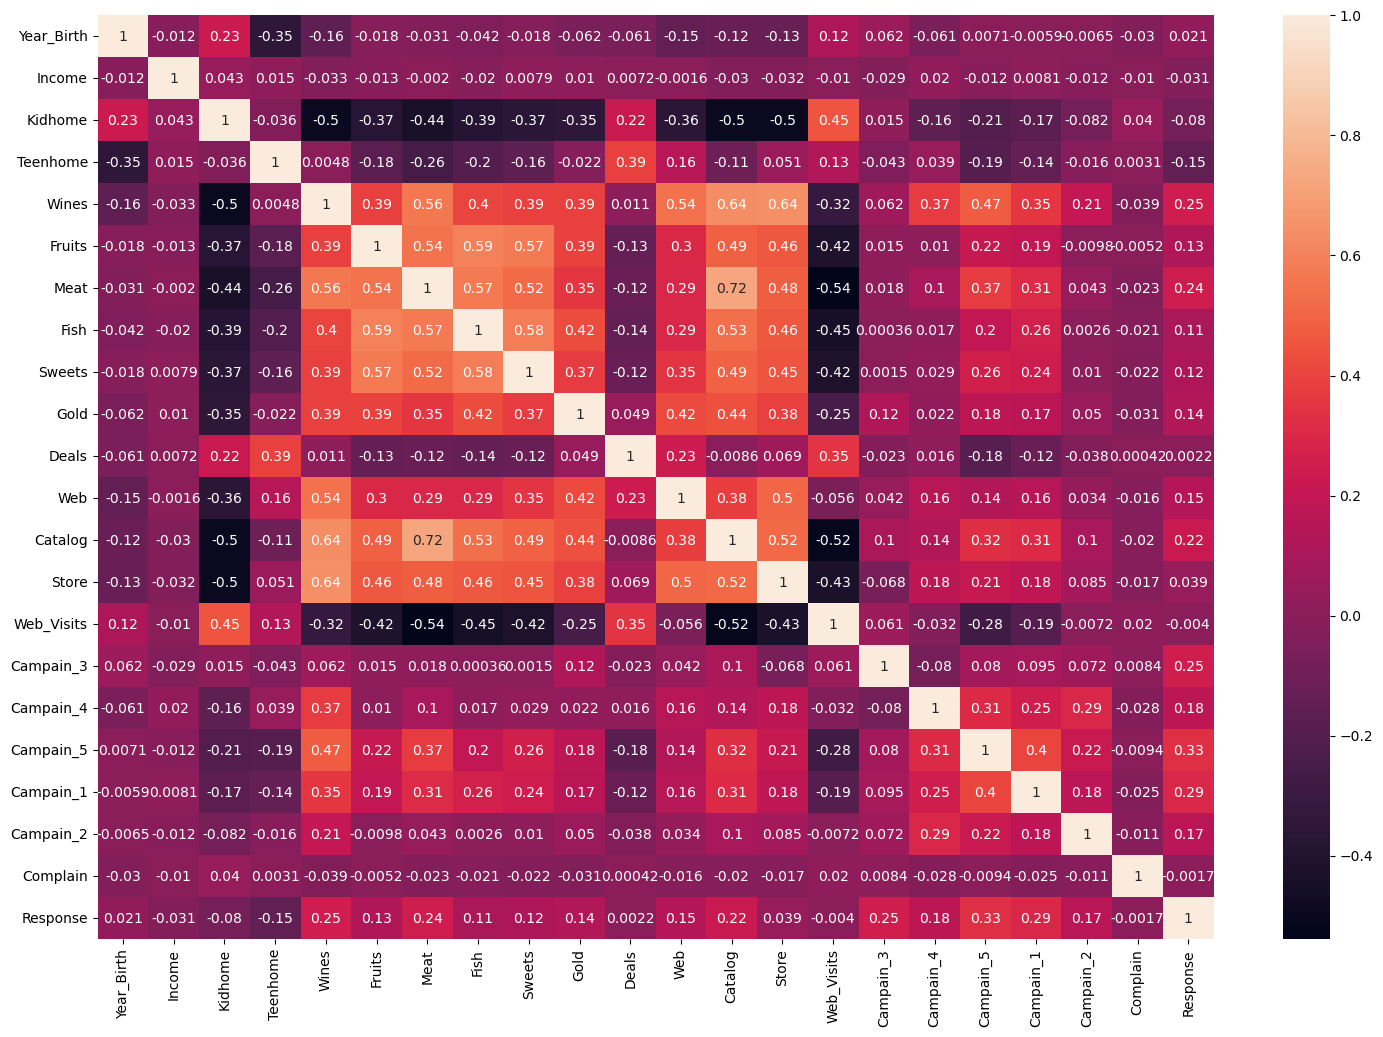

In [119]:
# Creating a heatmap to visualize the correlation matrix of the DataFrame 'df'
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Age Distribution

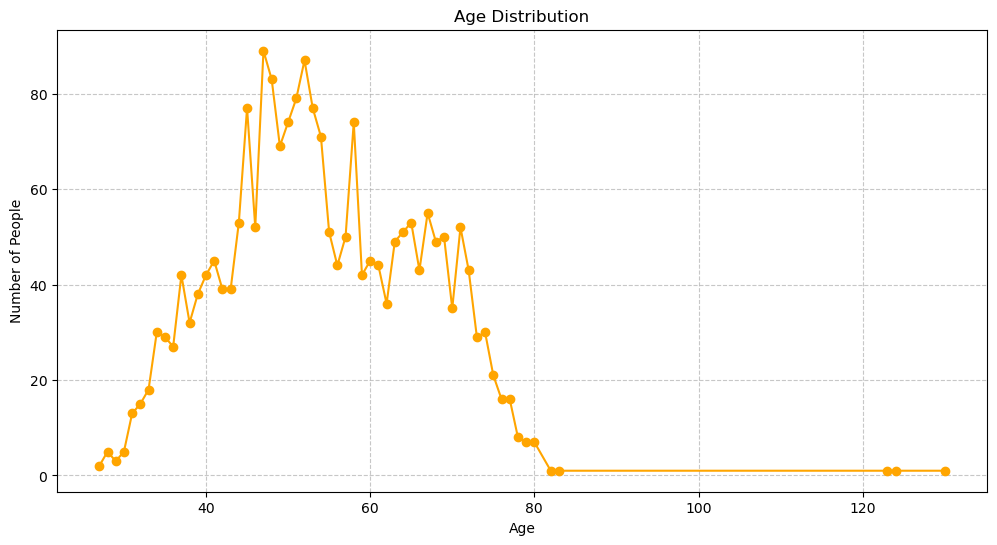

In [120]:
# Convert 'Year_Birth' to datetime and calculate age
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth'].dt.year

# Count the number of people in each age group
age_distribution = df['Age'].value_counts().sort_index()

# Plot the age distribution as a line graph
plt.figure(figsize=(12, 6))
plt.plot(age_distribution.index, age_distribution.values, marker='o', linestyle='-', color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Marital Status Distribution

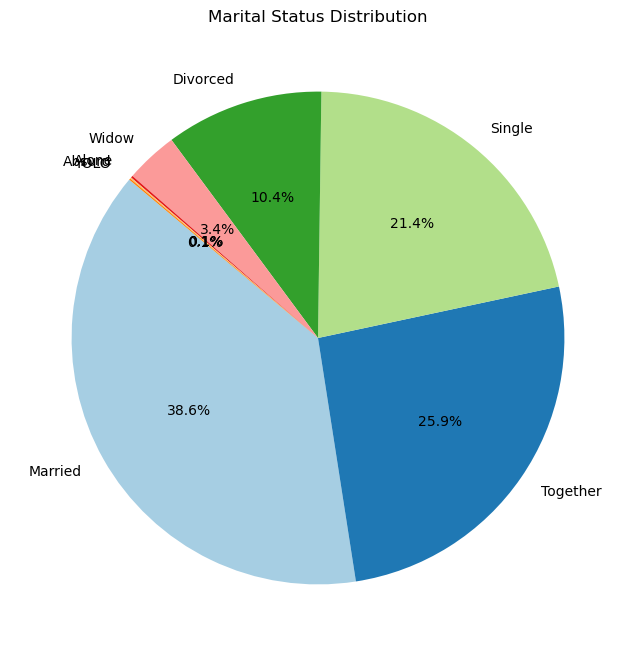

In [121]:
# Count the occurrences of each marital status
marital_status_counts = df['Marital_Status'].value_counts()

# Calculate the percentage distribution
marital_status_percentage = marital_status_counts / marital_status_counts.sum() * 100

# Plotting the Marital Status Distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_status_percentage, labels=marital_status_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Marital Status Distribution')
plt.show()

# Customer Response On The Campaigns 


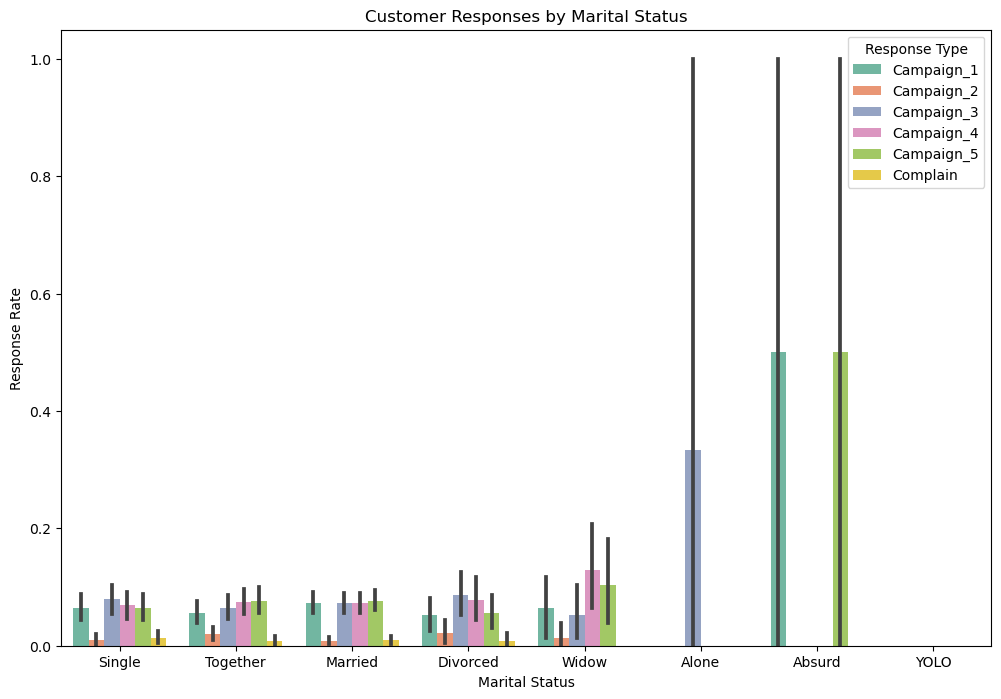

In [218]:
# Filter relevant columns
selected_columns = ['Marital_Status', 'Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5', 'Complain']
df_selected = df[selected_columns]

# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df_selected, id_vars='Marital_Status', var_name='Response_Type', value_name='Response')

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital_Status', y='Response', hue='Response_Type', data=df_melted, palette='Set2')
plt.title('Customer Responses by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Response Rate')
plt.legend(title='Response Type')
plt.show()

# Average Consumption of Products by Matital Status

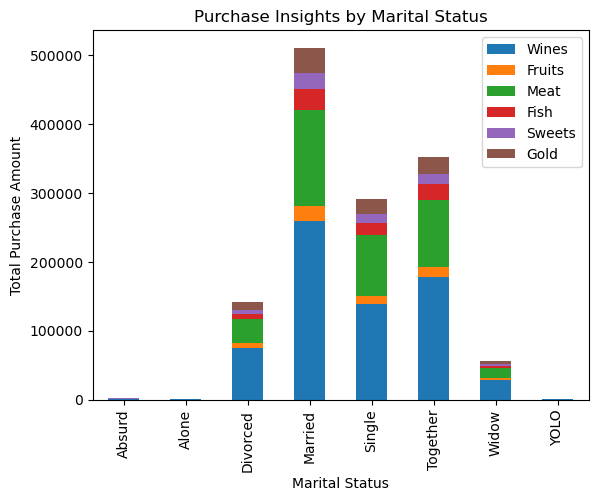

In [154]:
# Assuming your data is stored in a DataFrame called 'df'
# If it's not already loaded, you can load it using pd.read_csv('your_data.csv')

# Create a new DataFrame for purchase data based on marital status
purchase_data = df[['Marital_Status', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]

# Group by marital status and calculate the total purchase amounts
purchase_by_marital = purchase_data.groupby('Marital_Status').sum()

# Plot the data
purchase_by_marital.plot(kind='bar', stacked=True)
plt.title('Purchase Insights by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase Amount')
plt.show()


In [162]:
# Calculate the age of each individual by subtracting their birth year from the current year (2023)
df['Age'] = 2023 - df['Year_Birth']

# Create age groups based on predefined bins and labels
df['Age_Group'] = pd.cut(df['Age'], 
                       bins=[0, 20, 40, 60, 80, 100], 
                       labels=['0-20', '20-40', '40-60', '60-80', '80-100'])


# Average Consumption of Products by Age

Text(0.5, 1.0, 'Average Consumption\xa0by\xa0Age')

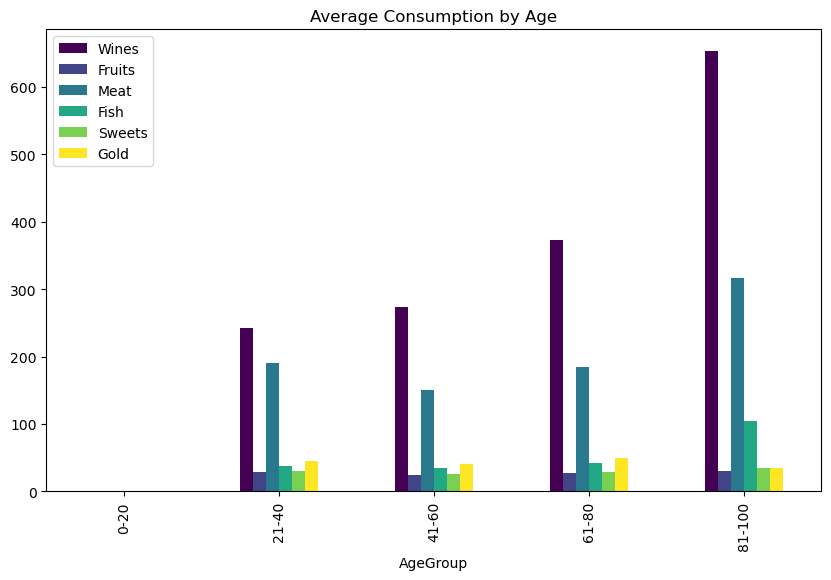

In [163]:
# Calculate the total consumption for each product by age group

# Create a new column 'AgeGroup' in the DataFrame based on the age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average consumption of each product by age group
avg_consumption_by_age = df.groupby('AgeGroup')[['Wines','Fruits','Meat','Fish','Sweets','Gold']].mean()

# Plot the graph
ax = avg_consumption_by_age.plot(kind='bar', figsize=(10, 6), colormap='viridis')
ax.set_title('Average Consumption by Age')

Text(0.5, 1.0, 'Consumption platform by Age')

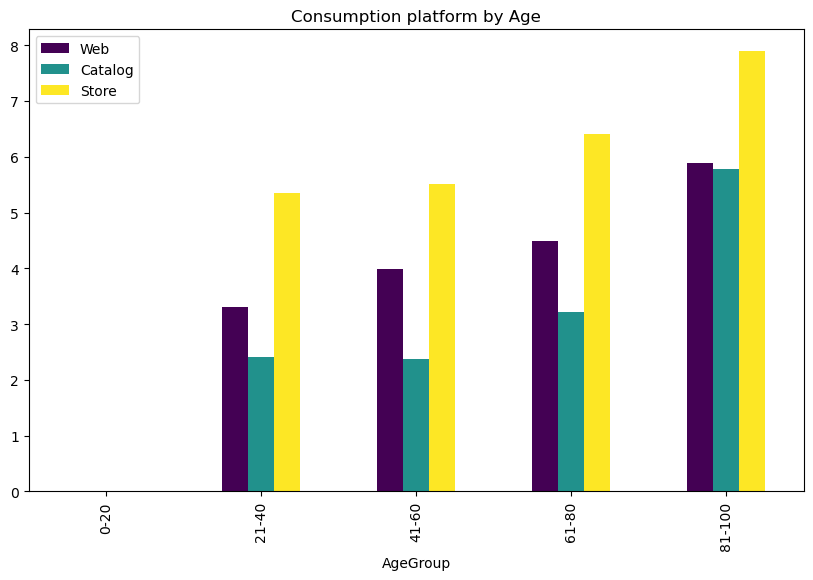

In [165]:
# Calculate the total consumption for each product by age group

# Create a new column 'AgeGroup' in the DataFrame based on age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group the DataFrame by 'AgeGroup' and calculate the average consumption for each platform
avg_consumption_by_age = df.groupby('AgeGroup')[['Web', 'Catalog', 'Store']].mean()

# Plot the graph
ax = avg_consumption_by_age.plot(kind='bar', figsize=(10, 6), colormap='viridis')
ax.set_title('Consumption platform by Age')

# Total Responses to Marketing Campaigns by Marital Status

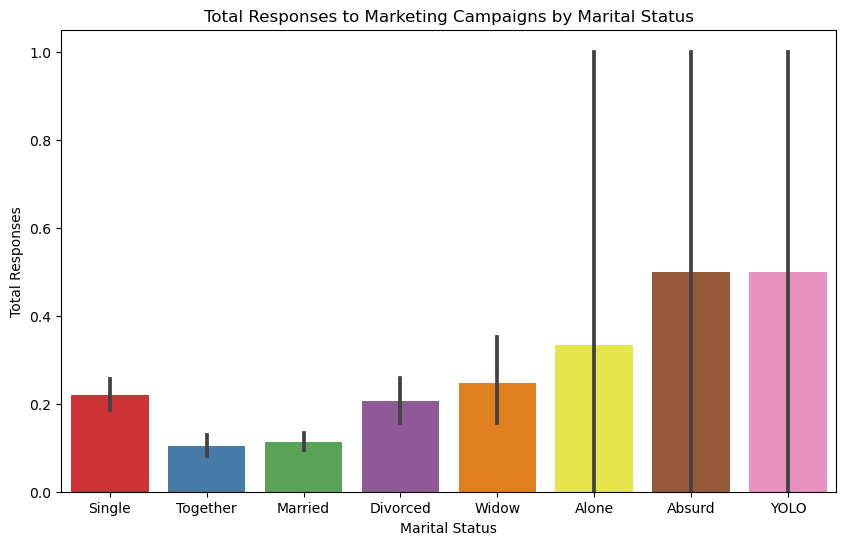

In [206]:
# Sum the responses for each marketing campaign
df['TotalResponses'] = df[['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn, showing total responses based on marital status
sns.barplot(x='Marital_Status', y='Response', data=df, palette='Set1')

# Set labels and title for better readability
plt.xlabel('Marital Status')
plt.ylabel('Total Responses')
plt.title('Total Responses to Marketing Campaigns by Marital Status')

# Display the plot
plt.show()

# Distribution of People with Graduation Education Based on Marital Status 

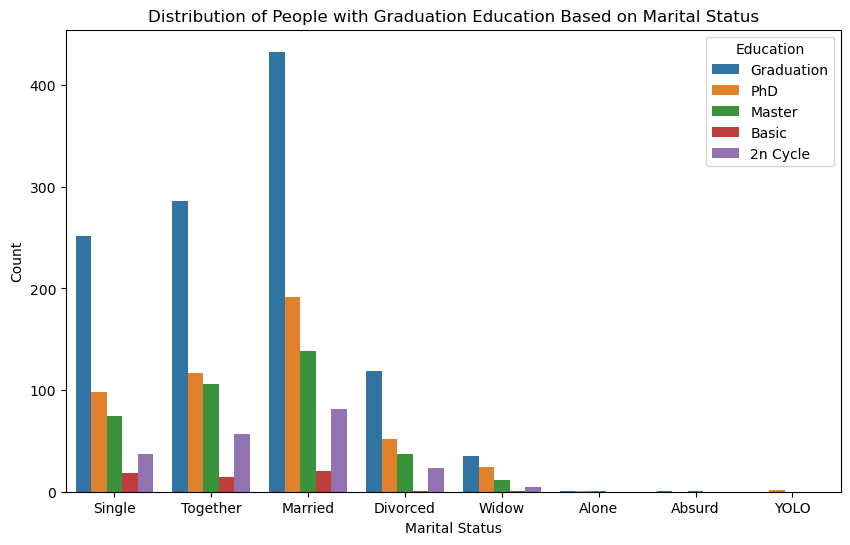

In [156]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6))

# Using seaborn's countplot to visualize the distribution of people with Graduation Education based on Marital Status
sns.countplot(x='Marital_Status', hue='Education', data=df)

# Adding a title to the plot
plt.title('Distribution of People with Graduation Education Based on Marital Status')

# Adding labels to the x and y axis
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Display the plot
plt.show()

# ALGORITHMS



In [167]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

# Converting column to numerical values
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['Kidhome'] = label_encoder.fit_transform(df['Kidhome'])
df['Teenhome'] = label_encoder.fit_transform(df['Teenhome'])

# For demonstration purposes, let's assume 'Response' is the target variable
X = df[['Education', 'Marital_Status','Income','Kidhome','Teenhome','Campain_1', 'Campain_2', 'Campain_3', 'Campain_4', 'Campain_5']]  # Features
y = df['Response']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

KNN Accuracy: 0.8415178571428571

Confusion Matrix:
[[366  13]
 [ 58  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.46      0.16      0.24        69

    accuracy                           0.84       448
   macro avg       0.66      0.56      0.57       448
weighted avg       0.80      0.84      0.81       448



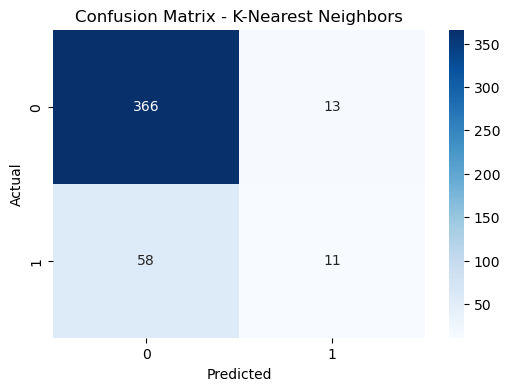

In [168]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test,knn_predictions)
print(f'KNN Accuracy: {knn_accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Naive Bayes

Naive Bayes Accuracy: 0.7700892857142857

Confusion Matrix:
[[315  64]
 [ 39  30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       379
           1       0.32      0.43      0.37        69

    accuracy                           0.77       448
   macro avg       0.60      0.63      0.61       448
weighted avg       0.80      0.77      0.78       448



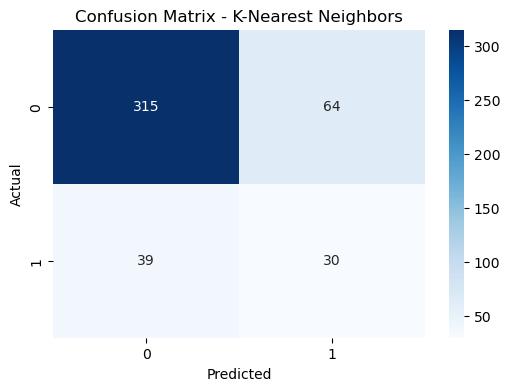

In [169]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)

#Evaluate the model
knn_accuracy = accuracy_score(y_test, nb_predictions)
conf_matrix = confusion_matrix(y_test, nb_predictions)
classification_rep = classification_report(y_test,nb_predictions)
print(f'Naive Bayes Accuracy: {nb_accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Logistic regression 

Accuracy: 0.8549107142857143

Confusion Matrix:
[[370   9]
 [ 56  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       379
           1       0.59      0.19      0.29        69

    accuracy                           0.85       448
   macro avg       0.73      0.58      0.60       448
weighted avg       0.83      0.85      0.82       448



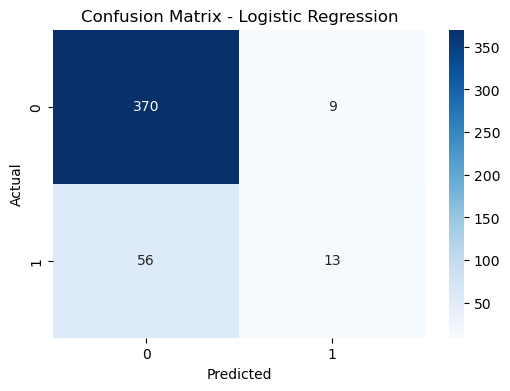

In [172]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Random Forest Classifier

Accuracy: 0.8415178571428571

Confusion Matrix:
[[362  17]
 [ 54  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       379
           1       0.47      0.22      0.30        69

    accuracy                           0.84       448
   macro avg       0.67      0.59      0.60       448
weighted avg       0.81      0.84      0.82       448



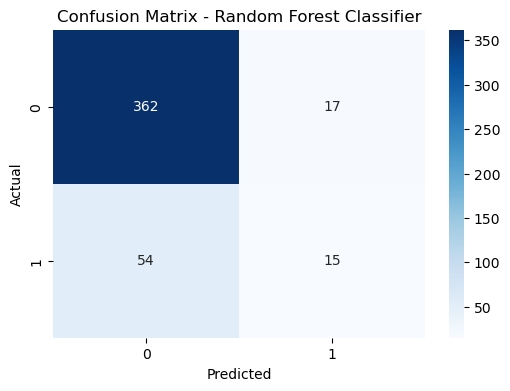

In [174]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()